<img src="header.png" alt="Drawing" style="width: 500px;"/>

<img src="schematic.png" alt="Drawing" style="width: 500px;"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


implementing the solver, Runge Kutta 4

In [2]:
def rk4(t,R,RHS,dt,parameters,noise=False):
    ## evolves one time step of RK4 scheme for the vector R(t) -> R(t+ dt)
    
    k1 = dt*RHS(t,R, parameters,noise)
    k2 = dt*RHS(t+dt*0.5, R+k1*0.5, parameters,noise)
    k3 = dt*RHS(t+dt*0.5, R+k2*0.5, parameters,noise)
    k4 = dt*RHS(t+dt, R+k3, parameters,noise)
    return (R + (k1 + 2*k2 + 2*k3 + k4)*(1/6))

<img src="equation.png" alt="Drawing" style="width: 500px;"/>

Where

<img src="equation2.png" alt="Drawing" style="width: 500px;"/>

Let's write the RHS of the equations

In [3]:
def RHS(t,R,parameters,noise=False):
    ## caclulates the RHS of the equation 28 in the https://www.sciencedirect.com/science/article/pii/S0022519307006510?via%3Dihub.
    # INPUTS 
    ## parameters: constants of the ODE
    ## t: time  
    ## R = (X, Y, Z) where
    # OUTPUTS 
    ## f = (f1, f2, f3) where
    ## f#'s are the RHS of the equation
    
    
    [vm2, vm3, v_in, v_p, k_2, k_CaA, k_CaI, k_ip3, k_p, k_deg, k_out, k_f, n, m] = parameters
    
    X = R[0]
    Y = R[1]
    Z = R[2]
    
    if noise:
        gaussian_noise = np.random.normal(0, 0.3)
        v_in = v_in + gaussian_noise
    v_serca = (vm2 * X**2) / (X**2 + k_2 **2)    
    v_PLC = (v_p * X**2) / (X**2 + k_p **2) 
    v_CICR = 4*vm3*(k_CaA**n * X**n / ( (X**n + k_CaA**n)*(X**n + k_CaI**n) ) )*(Z**m/(Z**m + k_ip3**m))*(Y-X)
    
    f1 = v_in - k_out*X + v_CICR - v_serca + k_f * (Y - X)
    f2 = v_serca - v_CICR - k_f * (Y- X)
    f3 = v_PLC - k_deg * Z

    f = np.array([f1, f2, f3])
    
    return f

Let's define an evolve function for convenience

In [4]:
def evolve (t_initial, t_final, R, dt, parameters,noise= False):
    ## evolves the vector R from the initial time to the final time, R(t_initial) -> R(t_final)
    ## using rk4.

    t = t_initial ## starting time

    ## define arrays for storing the solution
    t_array = np.arange(t_initial, t_final+dt, dt)
    X_array = np.zeros((len(t_array)),dtype=np.float64)
    Y_array = np.zeros((len(t_array)),dtype=np.float64)
    Z_array = np.zeros((len(t_array)),dtype=np.float64)
    # Set initial values
    X_array[0] = R[0]
    Y_array[0] = R[1]
    Z_array[0] = R[2]
    
    ## evolve by iterating rk4 len(t_array)
    for i in range(1, len(t_array)):
        R_next = rk4(t,R,RHS,dt,parameters,noise) ## main part
        # save the values and update R
        X_array[i] = R_next[0] 
        Y_array[i] = R_next[1]
        Z_array[i] = R_next[2]
        t_array[i] = t 
        R = R_next
        t +=dt
    return t_array,X_array,Y_array,Z_array

Parameters:
<img src="parameters.png" alt="Drawing" style="width: 400px;"/>

In [5]:
def param_init():
    vm2 = 15
    vm3 = 40
    v_in = 0.05
    v_p = 0.05
    k_2 = 0.1
    k_CaA = 0.15
    k_CaI = 0.15
    k_ip3 = 0.1
    k_p = 0.3
    k_deg = 0.08
    k_out = 0.5
    k_f = 0.5
    n = 2.02
    m = 2.2
    params = [vm2, vm3, v_in, v_p, k_2, k_CaA, k_CaI, 
              k_ip3, k_p, k_deg, k_out, k_f, n, m]
    return np.asarray(params)
parameters = param_init()

Initial Conditions:

In [6]:
#initial condition
X0 = 0.1
Y0 = 1.5
Z0 = 0.1
initial_conditions = np.array([X0,Y0,Z0])

Solver Parameters:

In [7]:
t_initial = 0
t_final = 600
dt = 1/128

Solve

In [8]:
time,X,Y,Z = evolve(t_initial, t_final, initial_conditions, dt, parameters)

Plotting:

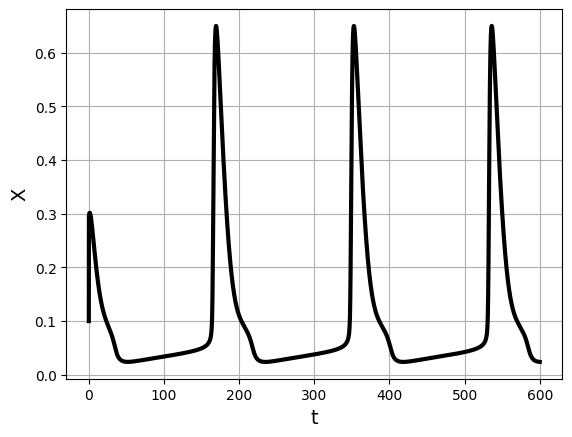

In [9]:
plt.figure()
plt.plot(time,X,'k',linewidth=3,label = 'X')
# plt.plot(time,Y,'r',linewidth=3,label = 'Y')
# plt.plot(time,Z,'g',linewidth=3,label = 'Z')
plt.xlabel(r"t", fontsize=14)
plt.ylabel(r"X", fontsize=14)
plt.grid(True)


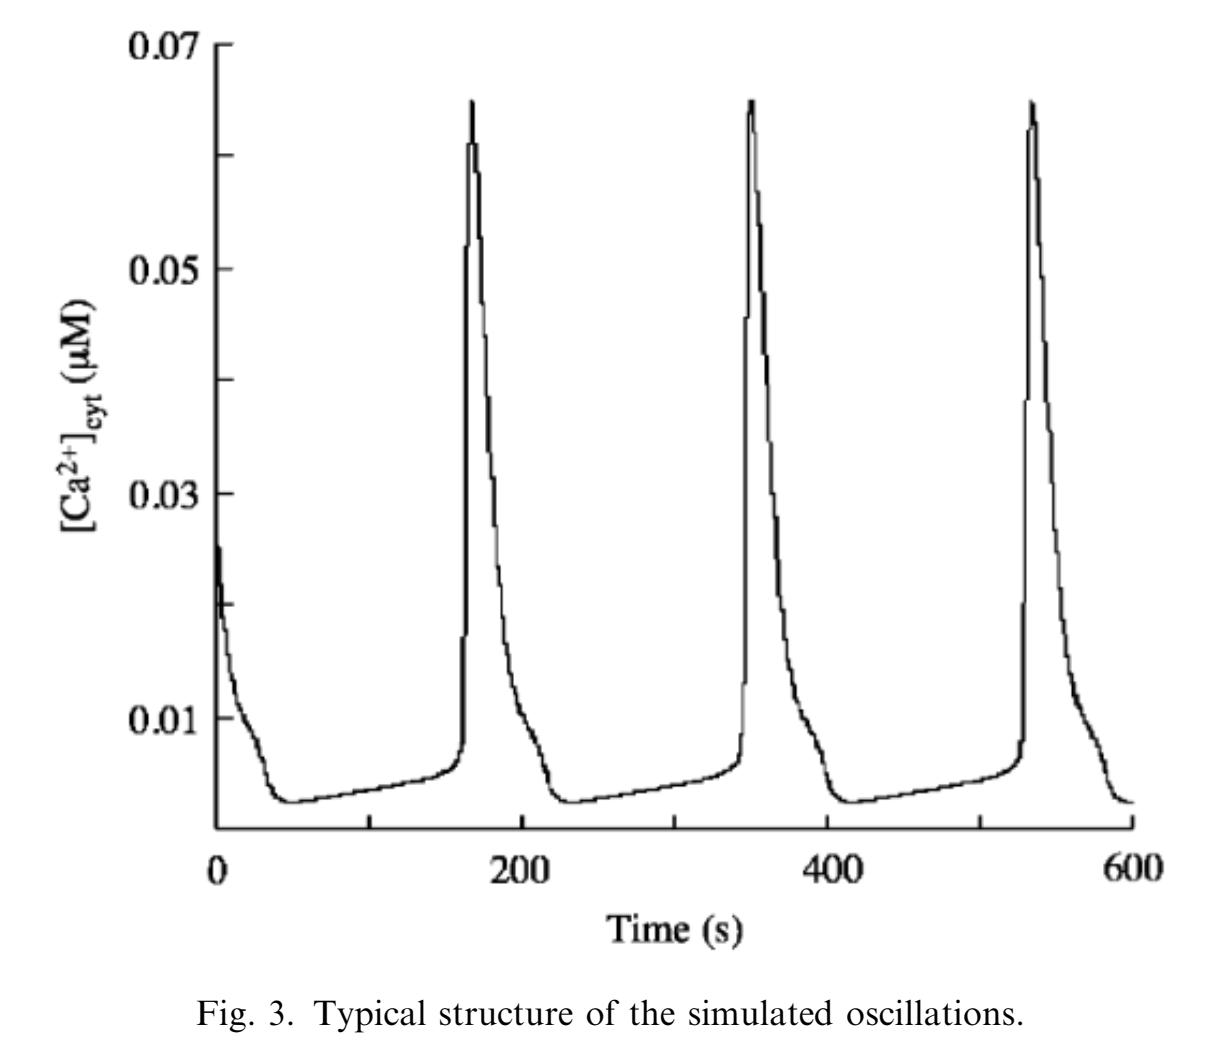

In [10]:
from IPython.display import Image, display
display(Image('figure1.png', width=600))

changing v_in

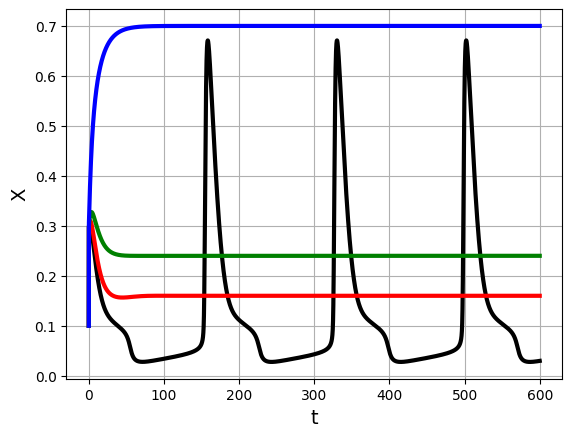

In [11]:
parameters[2] = 0.06
time,X1,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
parameters[2] = 0.08
time,X2,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
parameters[2] = 0.12
time,X3,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
parameters[2] = 0.35
time,X4,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
plt.figure()
plt.plot(time,X1,'k',time,X2,'r',time,X3,'g',time,X4,'b',linewidth=3)
plt.xlabel(r"t", fontsize=14)
plt.ylabel(r"X", fontsize=14)
plt.grid(True)

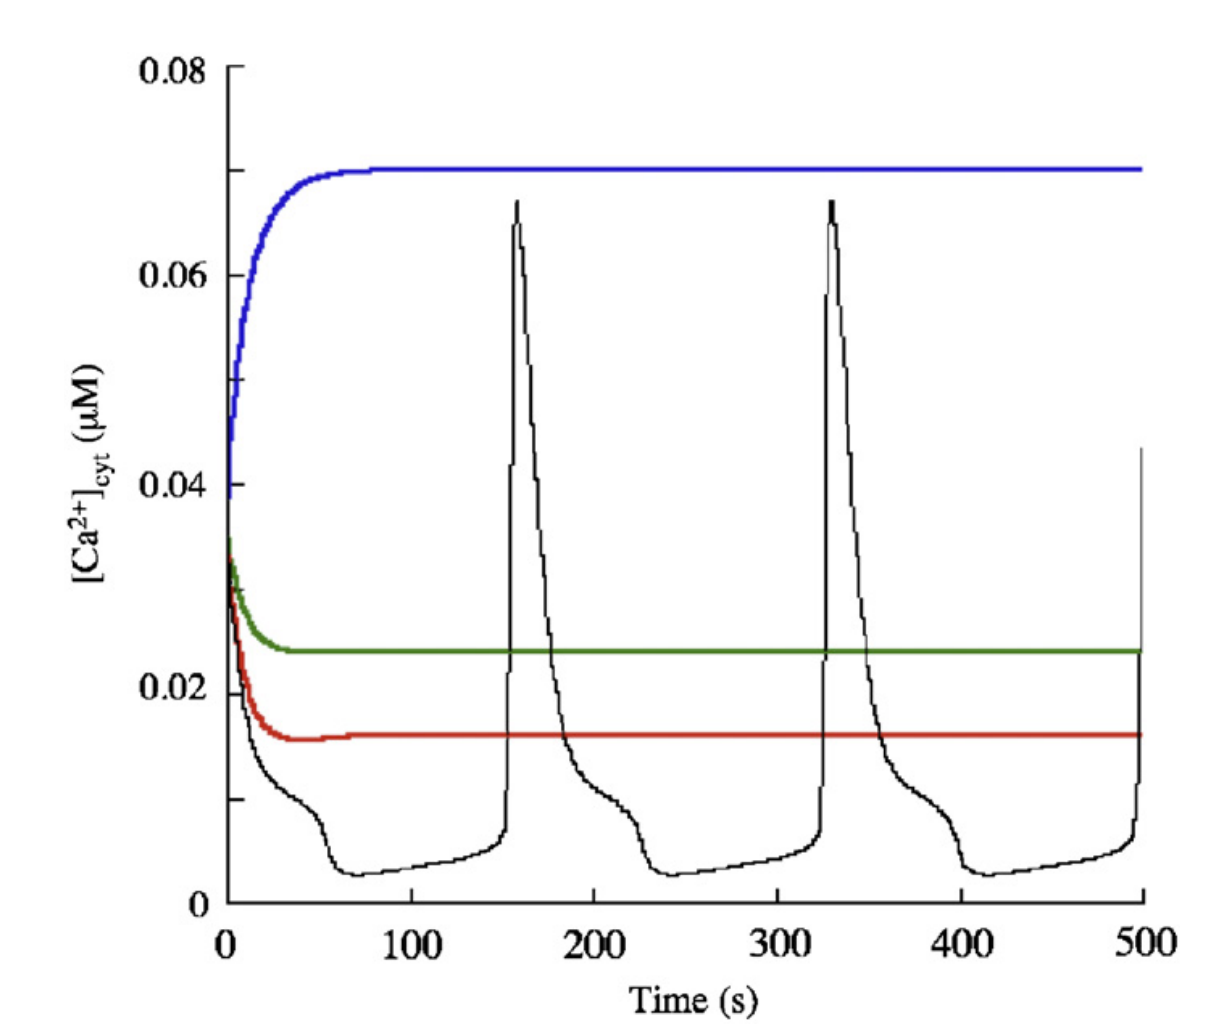

In [12]:
from IPython.display import Image, display
display(Image('figure2.png', width=600))

Activation and inhibation of SERCA pumps. i.e., changing v_serca

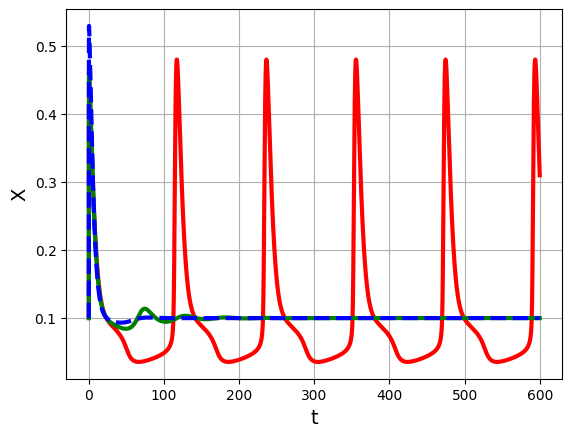

In [13]:
parameters = param_init()
parameters[0] = 7
time,X2,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
parameters[0] = 5
time,X3,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
parameters[0] = 3
time,X4,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
plt.figure()
plt.plot(time,X2,'r',time,X3,'g',time,X4,'b--',linewidth=3)
plt.xlabel(r"t", fontsize=14)
plt.ylabel(r"X", fontsize=14)
plt.grid(True)

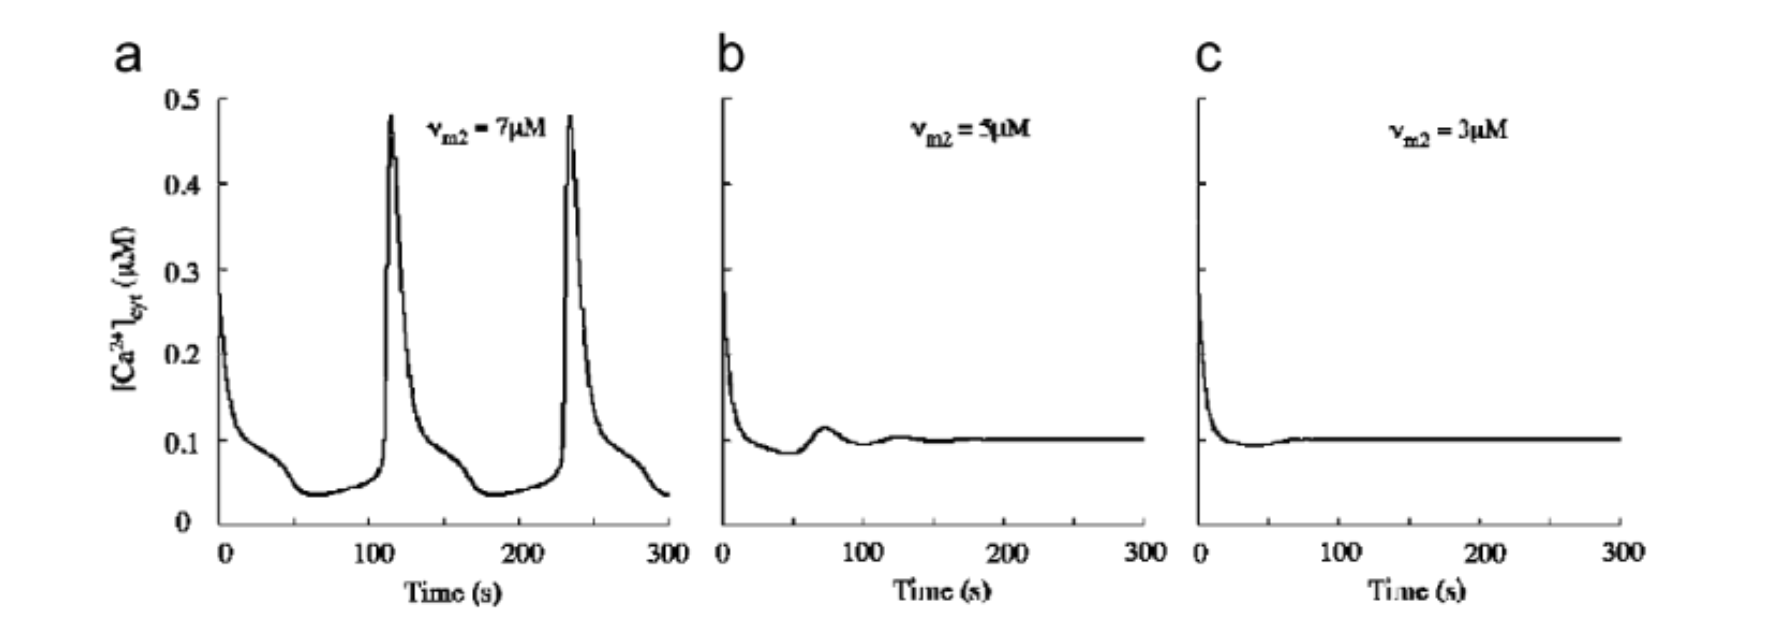

In [14]:
from IPython.display import Image, display
display(Image('figure3.png', width=600))

Some complex behavior

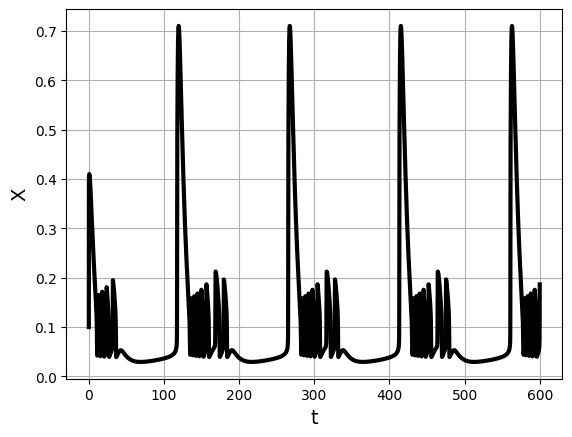

In [15]:
parameters = param_init()
parameters[8] = 0.164 #k_p lowered
parameters[6] = 0.27  #k_CaA increased
parameters[5] = 0.27  #k_CaI increased
time,X1,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters)
plt.figure()
plt.plot(time,X1,'k',linewidth=3,label = 'X')
plt.xlabel(r"t", fontsize=14)
plt.ylabel(r"X", fontsize=14)
plt.grid(True)

What about data:

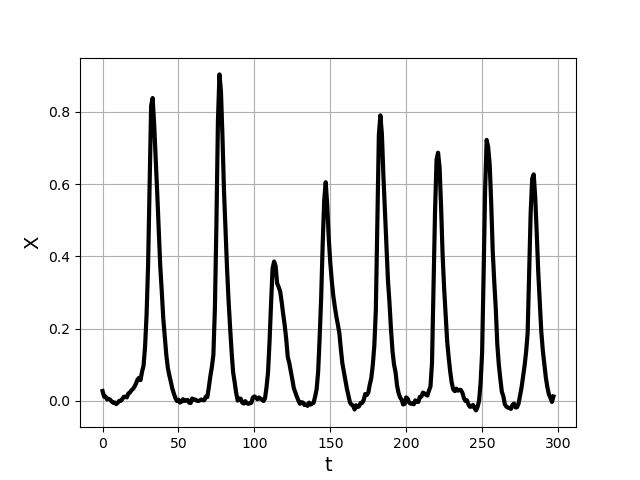

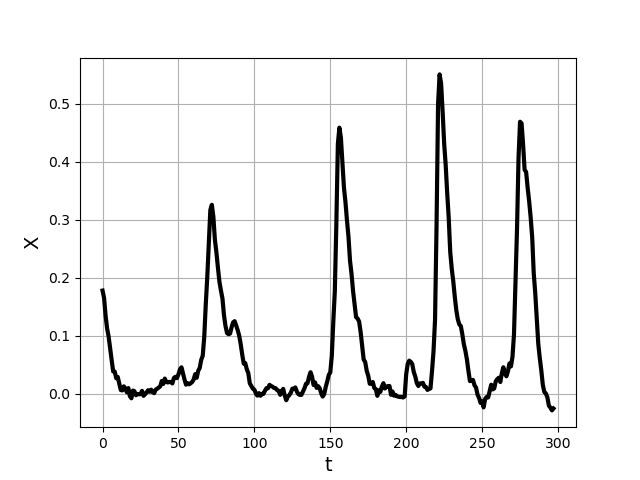

In [16]:
from IPython.display import Image, display
display(Image('cell_76.png', width=600))
display(Image('cell_80.png', width=600))

let's try to imitate:

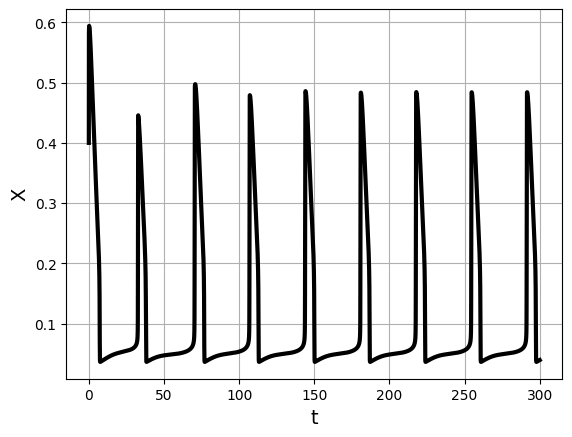

In [17]:
t_final = 300
#initial condition
X0 = 0.4
Y0 = 1.5
Z0 = 0.1
initial_conditions = np.array([X0,Y0,Z0])

parameters = param_init()
parameters[0] = 8
parameters[1] = 25
parameters[8] = 0.14 #k_p lowered
parameters[7] = 0.10 # k_2
parameters[6] = 0.4 #k_CaA increased
parameters[5] = 0.4  #k_CaI increased
time,X1,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters,False)
plt.figure()
plt.plot(time,X1,'k',linewidth=3,label = 'X')
plt.xlabel(r"t", fontsize=14)
plt.ylabel(r"X", fontsize=14)
plt.grid(True)

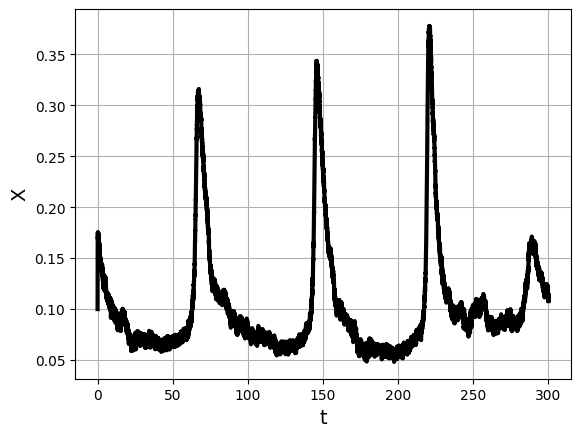

In [22]:
t_final = 300
#initial condition
X0 = 0.1
Y0 = 0.5
Z0 = 0.1
initial_conditions = np.array([X0,Y0,Z0])

parameters = param_init()
parameters[0] = 15/2.1
parameters[1] = 40/3
parameters[2] = 0.051
parameters[4] = 0.16
parameters[8] = 0.3 
parameters[5] = 1.9 
parameters[6] = 0.15 
time,X1,_,_ = evolve(t_initial, t_final, initial_conditions, dt, parameters,True)
plt.figure()
plt.plot(time,X1,'k',linewidth=3,label = 'X')
plt.xlabel(r"t", fontsize=14)
plt.ylabel(r"X", fontsize=14)
plt.grid(True)